In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

ket1 = basis(2,0) # Basis state 1
ket2 = basis(2,1) # Basis state 2

## Open system
The total Hamiltonian of a quantum system is given by

$$
\hat{H}_{\text {Total}}= \hat{H}_{\text {SoI}}+\hat{V}_{\text {IoI}}+\hat{V}_{\text {SoI}}+\hat{H}_{\text {world}}+\hat{V}_{\text {world}}
$$

$\hat{H}_{\text{SoI}}$ - the Hamiltonian of the system of interest, e.g., the radical pair.

$\hat{V}_{\text{IoI}}$ - interactions of interest, e.g., singlet-triplet interconversion.

$\hat{V}_{\text {SoI}}$ - interactions within the system of interest that we do not want to describe explicitly, e.g., the radical pair recombination.

$\hat{V}_{\text {world}}$ - interactions with the rest of the world, e.g., fluorescence.

In the open system approach, we only keep $\hat{H}_{\text {SoI}}+\hat{V}_{\text {IoI}}$ in the Hamiltonian and treat the rest as relaxation.

## Lindblad equation

The evolution of an open quantum system with relaxation is described by the Lindblad master equation

$$
    \dfrac{d}{dt}\hat{\rho}=-\dfrac{i}{\hbar}\left[\hat{H},\hat{\rho}\right]+\dfrac{1}{2}\sum_{n} \left(2\hat{L}_n\hat{\rho} \hat{L}_n^{\dagger}-\hat{\rho}\hat{L}_n^{\dagger}\hat{L}_n-\hat{L}_n^{\dagger}\hat{L}_n\hat{\rho}\right),
$$

where $\hat{L}_n$ is a collapse operator corresponding to the relaxation process $n$. The form of $\hat{L}_n$ depends on the nature of the relaxation process.

### Common collapse operators:

$\hat{L}=\sqrt{\Gamma}|2\rangle\langle1|$ - irreversible transitions from $|1\rangle$ to $|2\rangle$ at a rate $\Gamma$ (e.g., due to spontaneous emission). Corresponds to longitudinal relaxation at a rate $\Gamma$:

    $$
    \dot{\rho}_{22}=\Gamma\rho_{11},\ \dot{\rho}_{11}=-\Gamma\rho_{11},
    $$

and transverse relaxation at a rate $\Gamma/2$:

    $$
     \dot{\rho}_{12}=-\dfrac{\Gamma}{2} \rho_{12},\ \dot{\rho}_{21}=-\dfrac{\Gamma}{2} \rho_{21}\\
    $$

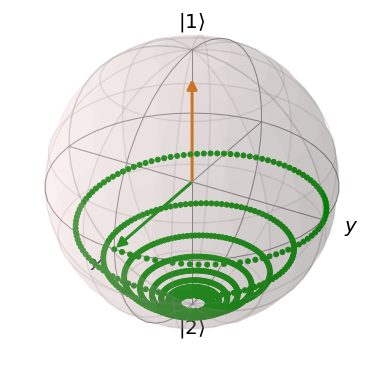

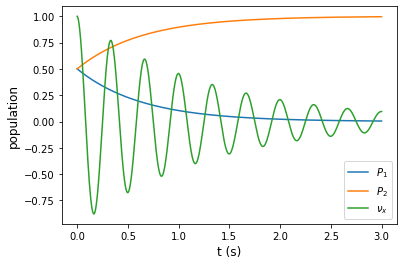

In [2]:
# Hamiltonian
H = 3*np.pi*sigmaz()
# Time grid
T = 3 # duration
N = 1000 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
Gamma1 = 0.5*np.pi # Relaxation rate
L1 = np.sqrt(Gamma1)*ket2*ket1.dag() # Relaxation from ket1 to ket2
c_ops = [L1]

# Initial state
psi0 = (ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.plot(result.times, result.expect[2],label=r'$\nu_x$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)

$\hat{L}=\sqrt{\Gamma}\hat{\sigma}_z=\sqrt{\Gamma}\left(|1\rangle\langle1|-|2\rangle\langle2|\right)$ - dephasing between $|1\rangle$ and $|2\rangle$ at a rate $\Gamma$. Corresponds to transverse relaxation at a rate $\Gamma$.

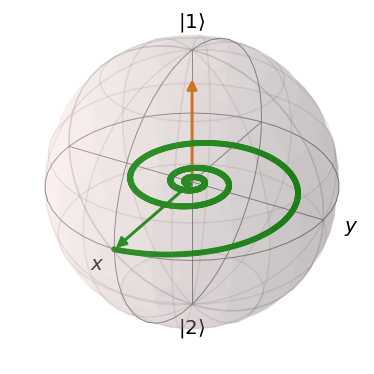

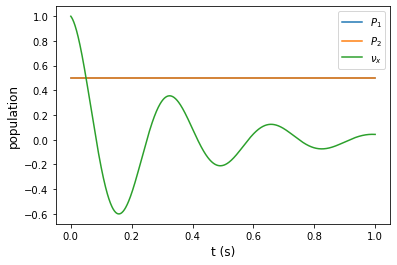

In [3]:
# Hamiltonian
H = 3*np.pi*sigmaz()

# Time grid
T = 1 # duration
N = 1000 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
Gamma2 = 0.5*np.pi # Relaxation rate
L2 = np.sqrt(Gamma2)*sigmaz() # Dephasing
c_ops = [L2]

# Initial state
psi0 = (ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.plot(result.times, result.expect[2],label=r'$\nu_x$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)


## Transverse relaxation

- Relaxation of $\nu_x$ and $\nu_y$.
- Can occur without longitudinal relaxation (e.g., dephasing).
- Leads to ensemble depolarization.
- Typically characterized in terms of the relaxation rate $\Gamma_2$ and the relaxation time $T_2$.
- $\Gamma_2\ge\dfrac{\Gamma_1}{2},\ T_2 \le2T_1$.

# Steady state

In the most general case, the Bloch vector dynamics with relaxation can be phenomenologically described as

$$
\dot{\vec{\nu}}=\vec{\Omega} \times \vec{\nu}-\left[\begin{array}{l}\Gamma_2 \left(\nu_x - \nu_x' \right)\\\Gamma_2 \left(\nu_y - \nu_y' \right) \\\Gamma_1 \left(\nu_z - \nu_z' \right)\end{array}\right],
$$

where $\vec{\nu}'$ is the Bloch vector corresponding to the **relaxation** **steady state,** i.e., the state that the system reaches due to the relaxation when $\Omega = 0$.

$$
\dot{\vec{\nu}}=\hat{M}\cdot\vec{\nu}-\tilde{\nu},
$$

Alternatively, the evolution can be written in the matrix form as

$$
\hat{M}=\left(\begin{array}{ccc}-\Gamma_2 & -\Omega_z & \Omega_y \\\Omega_z & -\Gamma_2 & -\Omega_x \\-\Omega_y & \Omega_x & -\Gamma_1\end{array}\right)\ \text{and}\ \ \tilde{\nu}=-\left(\begin{array}{l}\Gamma_2\nu_x' \\\Gamma_2 \nu_y'\\\Gamma_1 \nu_z'\end{array}\right).
$$

Often, the basis is chosen so that $\nu_x'=\nu_y'=0$ and $\Omega_y=0$.

Regardless of the initial state, the system eventually reaches its **steady state** $\vec{\nu}_{\rm s}$, defined by

In [4]:
# Hamiltonian
delta = 0*2*np.pi
Omega = 2*2*np.pi
H = -0.5*delta*sigmaz()+0.5*Omega*sigmax()

# Time grid
T = 3 # duration
N = 1000 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
Gamma1 = 1*np.pi # Relaxation rate
L1 = np.sqrt(Gamma1)*ket2*ket1.dag() # Relaxation from ket1 to ket2
c_ops = [L1]

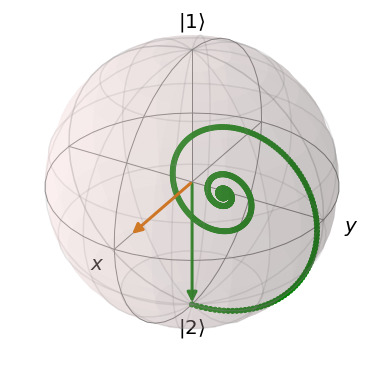

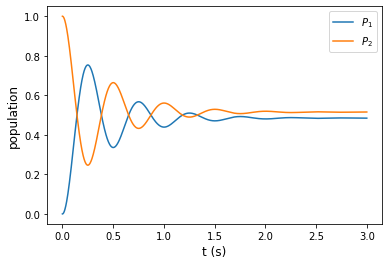

In [5]:
# Initial state is ket2
psi0 = ket2

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)

C:\Users\trety\anaconda3\envs\qutip\lib\site-packages\qutip\bloch.py:752: RuntimeWarning: divide by zero encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):
C:\Users\trety\anaconda3\envs\qutip\lib\site-packages\qutip\bloch.py:752: RuntimeWarning: invalid value encountered in true_divide
  if any(abs(dist - dist[0]) / dist[0] > 1e-12):


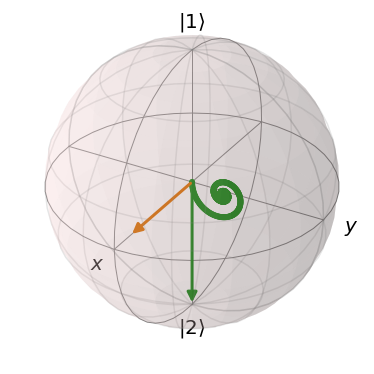

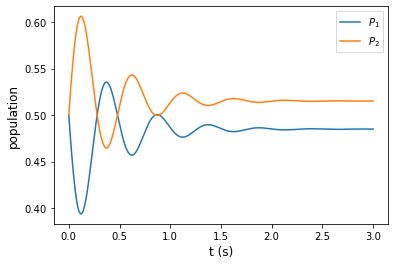

In [6]:
# Initial state is unpolarized
rho0 = 0.5*P1 + 0.5*P2

# Solve the master equation starting in ket1
result = mesolve(H, rho0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

# Plot the populations
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0],label=r'$P_{1}$')
ax.plot(result.times, result.expect[1],label=r'$P_{2}$')
ax.set_xlabel('t (s)',fontsize=12)
ax.set_ylabel('population',fontsize=12)
ax.legend(loc=0)


$$
\dot{\vec{\nu}_{\rm s}}=\vec{0} \ \text{or }\hat{M}\cdot\vec{\nu}_{\rm s}=\tilde{\nu}.
$$

In the steady state, the coupling between the two levels is balanced by the relaxation processes (similar to the equilibrium state in thermodynamics).

### Example 1: Rabi oscillations with spontaneous emission

The system parameters are given by

$$
\Omega_x = \Omega_{\rm R},\ \Omega_y=0,\ \Omega_z=-\delta, \ \nu_x'=\nu_y'=0,\ \nu_z' = -1
$$

The steady state is given by

$$
\vec{\nu}_{\rm s} = \hat{M}^{-1}\cdot \tilde{\nu} =\frac{1}{\Gamma_2^2+\delta^2+\Omega_{\rm R}^2 \frac{\Gamma_2}{\Gamma_1}}\left(\begin{array}{c}
\delta \Omega_{\rm R} \\
\Omega_{\rm R} \Gamma_2 \\
-\Gamma_2^2-\delta^2
\end{array}\right).
$$

In this case, the steady state is unique and does not depend on the initial state, only on the relaxation and Hamiltonian parameters.

The steady-state population is given by

$$
\rho_{11,\ \rm s}=\dfrac{1+\nu_{z,\rm s}}{2}=\dfrac{1}{2} \dfrac{\Omega_{\mathrm{R}}^2 \frac{\Gamma_2}{\Gamma_1}}{\Gamma_2^2+\delta^2+\Omega_{\mathrm{R}}^2\left(\frac{\Gamma_2}{\Gamma_1}\right)}.
$$

Note that $\rho_{11,\ \rm s}<\dfrac{1}{2}$.

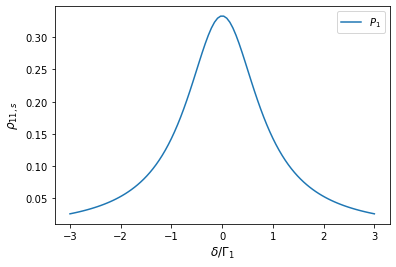

In [7]:
# Steady-state population as a function of the detuning

# Hamiltonian
Omega = 1*2*np.pi # Rabi frequency

def H(delta):
    # delta is the detuning
    return -0.5*delta*sigmaz()+0.5*Omega*sigmax()

# Collpase operators
Gamma1 = 2*np.pi # Relaxation rate
L1 = np.sqrt(Gamma1)*ket2*ket1.dag() # Relaxation from ket1 to ket2
c_ops = [L1]

# Detuning as a variable in units of Gamma1
delta = np.linspace(-3,3,100)

#Find the steady state
ss=[] # create a list for the steady states

for d in delta:
    ss.append(steadystate(H(d*Gamma1), [L1]))#steady state

P1_ss=expect(ket1.proj(),ss)

# Plot
fig, ax = plt.subplots()
ax.plot(delta, P1_ss,label=r'$P_{1}$')
ax.set_xlabel('$\delta/\Gamma_1$',fontsize=12)
ax.set_ylabel(r'$\rho_{11, s}$',fontsize=12)
ax.legend(loc=0)

### Example 2: Dephasing

The system parameters are given by

$$
\Omega_x =  \Omega_y=0,\ \Omega_z=\Omega_{\rm L}, \ \nu_x'=\nu_y'=0.
$$

In this case, $\operatorname{det}\hat{M} = 0$, meaning that $\hat{M}$ is non-invertible. As a result, the system has an infinite number of steady states.  Depending on the initial state, the steady-state Bloch vector is given by

$$
\vec{\nu}_{\rm s}=\begin{pmatrix}0 \\0\\ \nu_z(0)\end{pmatrix}.
$$

In [8]:
# Hamiltonian
Omega_L = 4*np.pi # Larmor frequency
H = 0.5*Omega_L*sigmaz()

# Time grid
T = 3 # duration
N = 1000 # number of points
t = np.linspace(0,T,N) # time grid

# Projection operators to find the population in the basis states
P1 = ket1.proj()
P2 = ket2.proj()

# Collpase operators
L2 = np.sqrt(Gamma2)*sigmaz() # Dephasing
c_ops = [L2]

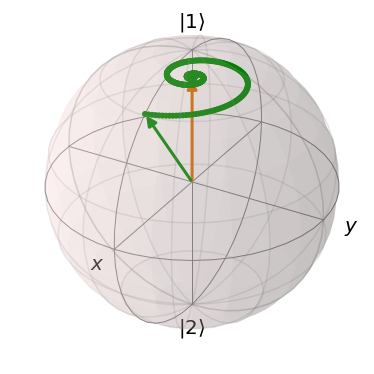

In [9]:
# Initial state
psi0 = (3*ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

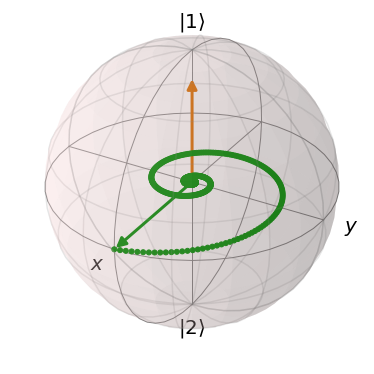

In [10]:
# Initial state
psi0 = (ket1+ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()

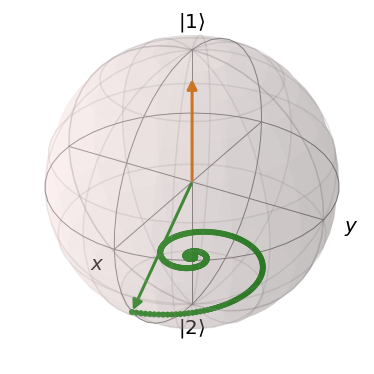

In [11]:
# Initial state
psi0 = (ket1+2*ket2).unit()

# Solve the master equation starting in ket1
result = mesolve(H, psi0, t, c_ops, [P1, P2, sigmax(), sigmay(), sigmaz()])

# Evolution on the Bloch sphere
b = Bloch()
b.zlabel = ['$\\left|1\\right>$', '$\\left|2\\right>$']
b.make_sphere()
b.add_points([result.expect[2],result.expect[3],result.expect[4]])
b.add_states([psi0, 0.8*H.unit()])
b.point_color=['green']
b.show()